<a href="https://colab.research.google.com/github/bebeam2942/Final_dataviz/blob/main/visualization_final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import time
from matplotlib import pyplot as plt
import matplotlib as mpl

# Cleaning Data

### ข้อมูล Covid

In [8]:
covid = pd.read_csv('/content/drive/MyDrive/dataviz_2021_data/covid19cases (2).csv')
covid

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57505,57506,26/4/2021,25/4/2021,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57506,57507,26/4/2021,25/4/2021,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57507,57508,26/4/2021,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57508,57509,26/4/2021,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN


In [9]:
covid.isnull().any() #ดูว่าcolumnไหนมีmissingบ้าง 

No.                      False
announce_date            False
Notified date             True
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

In [10]:
covid['province_of_onset'] = covid['province_of_onset'].fillna(value=covid['province_of_isolation'])
covid

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57505,57506,26/4/2021,25/4/2021,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN
57506,57507,26/4/2021,25/4/2021,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN
57507,57508,26/4/2021,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN
57508,57509,26/4/2021,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN


In [11]:
#แก้ไขข้อมูลที่จำเป็น โดยทำการจัดกลุ่มให้เป็นกลุ่มที่ชื่อว่า ไม่ปรากฎ
covid["province_of_isolation"].fillna("ไม่ปรากฎ", inplace = True)
covid["province_of_onset"].fillna("ไม่ปรากฎ", inplace = True)
covid["district_of_onset"].fillna("ไม่ปรากฎ", inplace = True)

#และจะ Drop Column "Notified date" ออก
covid.drop(columns=['Notified date'],inplace=True)


In [12]:
covid

,No.,announce_date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ
1,2,17/1/2020,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ
2,3,22/1/2020,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ
4,5,24/1/2020,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ
...,...,...,...,...,...,...,...,...,...,...
57505,57506,26/4/2021,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,ไม่ปรากฎ
57506,57507,26/4/2021,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,ไม่ปรากฎ
57507,57508,26/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,ไม่ปรากฎ
57508,57509,26/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,ไม่ปรากฎ


# ข้อที่ 1 เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน

In [13]:
covid['announce_date']  = pd.to_datetime(covid['announce_date'],format='%d/%m/%Y')

### จำนวนผู้ป่วยในแต่ละเดือน

In [14]:
Patient_totals = [covid[(covid['announce_date'].dt.month==1) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==2) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==3) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==4) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==5) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==6) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==7) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==8) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==9) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==10) & (covid['announce_date'].dt.year==2020)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==11) & (covid['announce_date'].dt.year==2020)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==12) & (covid['announce_date'].dt.year==2020)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==1) & (covid['announce_date'].dt.year==2021)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==2) & (covid['announce_date'].dt.year==2021)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==3) & (covid['announce_date'].dt.year==2021)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==4) & (covid['announce_date'].dt.year==2021)].count()[0]]
Patient_totals

[19,
 23,
 1609,
 1303,
 127,
 90,
 139,
 102,
 152,
 216,
 218,
 2886,
 11898,
 7169,
 2912,
 28647]

### ข้อมูลประชาชนที่เดินทาง

In [15]:
passenger = pd.read_excel("/content/drive/MyDrive/dataviz_2021_data/passenger-covid19.xlsx",sheet_name=3,skiprows=1,skipfooter=33)
passenger

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,28450

In [16]:
passenger.columns = [i.strftime('%Y-%m-%d %H:%M:%S') if isinstance(i,dt) else i for i in passenger.columns]
passenger.columns

Index(['Unnamed: 0', '2020-01-01 00:00:00', '2020-01-02 00:00:00',
       '2020-01-03 00:00:00', '2020-01-04 00:00:00', '2020-01-05 00:00:00',
       '2020-01-06 00:00:00', '2020-01-07 00:00:00', '2020-01-08 00:00:00',
       '2020-01-09 00:00:00',
       ...
       '2021-04-17 00:00:00', '2021-04-18 00:00:00', '2021-04-19 00:00:00',
       '2021-04-20 00:00:00', '2021-04-21 00:00:00', '2021-04-22 00:00:00',
       '2021-04-23 00:00:00', '2021-04-24 00:00:00', '2021-04-25 00:00:00',
       '2021-04-26 00:00:00'],
      dtype='object', length=483)

In [17]:
passenger_total = passenger.filter(regex='4',axis=0) #เลือกมาแค่ row "รวมประชาชนเดินทาง(คน)"
passenger_total

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,2845067,3538827,3557271,3583076,3540578,3719430,3080385,2828993,3613007,3586260,3534816,3553612,3571009,2999481,2787267,3489920,3506480,3458172,3458709,3663798,2809229,2744876,3511747,3514595,3541737,3479387,3704945,2870882,...,2118941,2241939,1680066,1483317,2048598,2116190,2084419,2136748,2252695,1756657,1530169,2150744,2126157,2155874,2180370,2274954,1786223,1513789,2125466,1500660,2032142,1952409,1916257,1382877,1088806,1194468,890406,897609,925295,1171059,991380,886623,1323452,1249329,1208025,1175707,1180619,869281,708446,1066591


### จำนวนคนเดินทางในแต่ละเดือน

In [18]:
passenger_Total = [passenger_total.iloc[:,1:32].sum(axis=1)[4]
            ,passenger_total.iloc[:,32:61].sum(axis=1)[4]
            ,passenger_total.iloc[:,61:92].sum(axis=1)[4]
            ,passenger_total.iloc[:,92:122].sum(axis=1)[4]
            ,passenger_total.iloc[:,122:153].sum(axis=1)[4]
            ,passenger_total.iloc[:,153:183].sum(axis=1)[4]
            ,passenger_total.iloc[:,183:214].sum(axis=1)[4]
            ,passenger_total.iloc[:,214:245].sum(axis=1)[4]
            ,passenger_total.iloc[:,245:275].sum(axis=1)[4]
            ,passenger_total.iloc[:,275:306].sum(axis=1)[4]
            ,passenger_total.iloc[:,306:336].sum(axis=1)[4]
            ,passenger_total.iloc[:,336:367].sum(axis=1)[4]
            ,passenger_total.iloc[:,367:398].sum(axis=1)[4]
            ,passenger_total.iloc[:,398:426].sum(axis=1)[4]
            ,passenger_total.iloc[:,426:457].sum(axis=1)[4]
            ,passenger_total.iloc[:,457:].sum(axis=1)[4]]
passenger_Total

[104516847,
 92564306,
 61635890,
 22653390,
 32569755,
 48464966,
 62241436,
 67208460,
 67916587,
 68487852,
 68527999,
 65242215,
 41277722,
 46950817,
 61514512,
 35492243]

### เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน

In [19]:
Graph = pd.DataFrame(Patient_totals,columns=['Patient Totals'])
Graph['Passenger Total'] =passenger_Total
Graph['Passenger Total'] = Graph['Passenger Total']/10000 #โดยจำนวนคนเดินทางจะมีหน่วยเป็น (หมื่นคน)
Graph.insert(0, "Month", ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20','Jan21','Feb21','Mar21','Apr21'], True)
Graph #เปรียบเทียบจำนวนผู้เดินทางกับจำนวนผู้ป่วยที่ติดโควิด-19 โดยใช้ตาราง

,Month,Patient Totals,Passenger Total
0,Jan20,19,10451.6847
1,Feb20,23,9256.4306
2,Mar20,1609,6163.5890
3,Apr20,1303,2265.3390
4,May20,127,3256.9755
5,Jun20,90,4846.4966
6,Jul20,139,6224.1436
7,Aug20,102,6720.8460
8,Sep20,152,6791.6587
9,Oct20,216,6848.7852


In [20]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [21]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

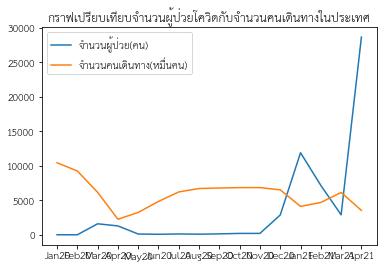

In [22]:
plt.plot(Graph['Month'],Graph["Patient Totals"],label = 'จำนวนผู้ป่วย(คน)')
plt.plot(Graph['Month'],Graph["Passenger Total"],label = 'จำนวนคนเดินทาง(หมื่นคน)')
plt.title('กราฟเปรียบเทียบจำนวนผู้ป่วยโควิดกับจำนวนคนเดินทางในประเทศ')
plt.legend();

สรุปได้ว่า เมื่อเปรียบเทียบจำนวนคนเดินทาง(หน่วย : หมื่นคน) กับ ผู้ป่วยโควิด (หน่วย : คน) จะเห็นได้ว่าจำนวนคนเดินทางในปี 2020 ถึง ปี 2021 มีจำนวนมากกว่าจำนวนผู้ป่วยหลายเท่า

#ข้อที่ 2 เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ

### ข้อมูลจำนวนผู้เดินทางแต่ละวิธีการเดินทาง

In [30]:
passenger

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,28450

In [31]:
passenger_Road = [passenger.iloc[:,1:32].sum(axis=1)[0]
            ,passenger.iloc[:,32:61].sum(axis=1)[0]
            ,passenger.iloc[:,61:92].sum(axis=1)[0]
            ,passenger.iloc[:,92:122].sum(axis=1)[0]
            ,passenger.iloc[:,122:153].sum(axis=1)[0]
            ,passenger.iloc[:,153:183].sum(axis=1)[0]
            ,passenger.iloc[:,183:214].sum(axis=1)[0]
            ,passenger.iloc[:,214:245].sum(axis=1)[0]
            ,passenger.iloc[:,245:275].sum(axis=1)[0]
            ,passenger.iloc[:,275:306].sum(axis=1)[0]
            ,passenger.iloc[:,306:336].sum(axis=1)[0]
            ,passenger.iloc[:,336:367].sum(axis=1)[0]
            ,passenger.iloc[:,367:398].sum(axis=1)[0]
            ,passenger.iloc[:,398:426].sum(axis=1)[0]
            ,passenger.iloc[:,426:457].sum(axis=1)[0]
            ,passenger.iloc[:,457:].sum(axis=1)[0]]
passenger_Road

[51184656,
 46429218,
 32946721,
 14071816,
 19371815,
 25723627,
 31550369,
 33311862,
 32661894,
 33084230,
 32234047,
 31315704,
 22617288,
 24150796,
 29315758,
 17801825]

In [32]:
passenger_Rail = [passenger.iloc[:,1:32].sum(axis=1)[1]
            ,passenger.iloc[:,32:61].sum(axis=1)[1]
            ,passenger.iloc[:,61:92].sum(axis=1)[1]
            ,passenger.iloc[:,92:122].sum(axis=1)[1]
            ,passenger.iloc[:,122:153].sum(axis=1)[1]
            ,passenger.iloc[:,153:183].sum(axis=1)[1]
            ,passenger.iloc[:,183:214].sum(axis=1)[1]
            ,passenger.iloc[:,214:245].sum(axis=1)[1]
            ,passenger.iloc[:,245:275].sum(axis=1)[1]
            ,passenger.iloc[:,275:306].sum(axis=1)[1]
            ,passenger.iloc[:,306:336].sum(axis=1)[1]
            ,passenger.iloc[:,336:367].sum(axis=1)[1]
            ,passenger.iloc[:,367:398].sum(axis=1)[1]
            ,passenger.iloc[:,398:426].sum(axis=1)[1]
            ,passenger.iloc[:,426:457].sum(axis=1)[1]
            ,passenger.iloc[:,457:].sum(axis=1)[1]]
passenger_Rail

[41947594,
 36460619,
 24466973,
 7368716,
 11482880,
 19881012,
 25890919,
 29055512,
 30044159,
 30259559,
 30409897,
 27947720,
 15761904,
 19785716,
 27852295,
 13723714]

In [33]:
passenger_water = [passenger.iloc[:,1:32].sum(axis=1)[2]
            ,passenger.iloc[:,32:61].sum(axis=1)[2]
            ,passenger.iloc[:,61:92].sum(axis=1)[2]
            ,passenger.iloc[:,92:122].sum(axis=1)[2]
            ,passenger.iloc[:,122:153].sum(axis=1)[2]
            ,passenger.iloc[:,153:183].sum(axis=1)[2]
            ,passenger.iloc[:,183:214].sum(axis=1)[2]
            ,passenger.iloc[:,214:245].sum(axis=1)[2]
            ,passenger.iloc[:,245:275].sum(axis=1)[2]
            ,passenger.iloc[:,275:306].sum(axis=1)[2]
            ,passenger.iloc[:,306:336].sum(axis=1)[2]
            ,passenger.iloc[:,336:367].sum(axis=1)[2]
            ,passenger.iloc[:,367:398].sum(axis=1)[2]
            ,passenger.iloc[:,398:426].sum(axis=1)[2]
            ,passenger.iloc[:,426:457].sum(axis=1)[2]
            ,passenger.iloc[:,457:].sum(axis=1)[2]]
passenger_water

[8261938,
 6998927,
 2526613,
 1155419,
 1503935,
 2241446,
 3481589,
 3176923,
 3344351,
 3012379,
 3402311,
 3690246,
 2258165,
 2152160,
 2672364,
 2671309]

In [34]:
passenger_Air = [passenger.iloc[:,1:32].sum(axis=1)[3]
            ,passenger.iloc[:,32:61].sum(axis=1)[3]
            ,passenger.iloc[:,61:92].sum(axis=1)[3]
            ,passenger.iloc[:,92:122].sum(axis=1)[3]
            ,passenger.iloc[:,122:153].sum(axis=1)[3]
            ,passenger.iloc[:,153:183].sum(axis=1)[3]
            ,passenger.iloc[:,183:214].sum(axis=1)[3]
            ,passenger.iloc[:,214:245].sum(axis=1)[3]
            ,passenger.iloc[:,245:275].sum(axis=1)[3]
            ,passenger.iloc[:,275:306].sum(axis=1)[3]
            ,passenger.iloc[:,306:336].sum(axis=1)[3]
            ,passenger.iloc[:,336:367].sum(axis=1)[3]
            ,passenger.iloc[:,367:398].sum(axis=1)[3]
            ,passenger.iloc[:,398:426].sum(axis=1)[3]
            ,passenger.iloc[:,426:457].sum(axis=1)[3]
            ,passenger.iloc[:,457:].sum(axis=1)[3]]
passenger_Air

[3122659,
 2675542,
 1695583,
 57439,
 211125,
 618881,
 1318559,
 1664163,
 1866183,
 2131684,
 2481744,
 2288545,
 640365,
 862145,
 1674095,
 1295395]

#### เปรียบเทียบโดยใช้ตาราง

In [35]:
df = pd.DataFrame(Patient_totals,columns=['Patient Totals'])
df['Pssenger Road'] =passenger_Road
df['Pssenger Rail'] =passenger_Rail
df['Pssenger water'] =passenger_water
df['Pssenger Air'] =passenger_Air
df.insert(0, "Month", ['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020','Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020','Jan2021','Feb2021','Mar2021','Apr2021'], True)
df

,Month,Patient Totals,Pssenger Road,Pssenger Rail,Pssenger water,Pssenger Air
0,Jan2020,19,51184656,41947594,8261938,3122659
1,Feb2020,23,46429218,36460619,6998927,2675542
2,Mar2020,1609,32946721,24466973,2526613,1695583
3,Apr2020,1303,14071816,7368716,1155419,57439
4,May2020,127,19371815,11482880,1503935,211125
5,Jun2020,90,25723627,19881012,2241446,618881
6,Jul2020,139,31550369,25890919,3481589,1318559
7,Aug2020,102,33311862,29055512,3176923,1664163
8,Sep2020,152,32661894,30044159,3344351,1866183
9,Oct2020,216,33084230,30259559,3012379,2131684


#### เปรียบเทียบโดยใช้กราฟ

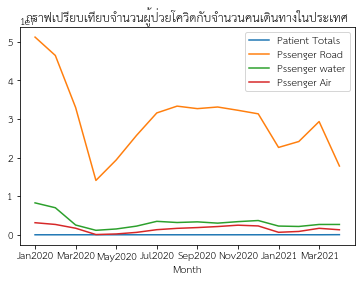

In [36]:
import matplotlib.pyplot as plt
df.plot(x="Month", y=["Patient Totals", "Pssenger Road",'Pssenger water',"Pssenger Air"])
plt.title('กราฟเปรียบเทียบจำนวนผู้ป่วยโควิดกับจำนวนคนเดินทางในประเทศ')
plt.show()

# ข้อที่ 3 เปรียบเทียบ จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10 ของ 6 เดือนล่าสุด

#### หาจำนวนผู้ป่วยโควิด-19 ในแต่ละจังหวัด

In [41]:
Covid_19 = covid.groupby('province_of_onset')['No.'].count()
Covid_19A = pd.DataFrame(Covid_19) #ตารางข้อมูลจำนวนผู้ป่วยในแต้ละจังหวัด
Covid_19A

,No.
province_of_onset,
กระบี่,78
กรุงเทพมหานคร,14611
กาญจนบุรี,103
กาฬสินธุ์,61
กำแพงเพชร,84
...,...
เวียงจันทร์,1
แพร่,71
แม่ฮ่องสอน,41


In [42]:
Covid_Top10 = Covid_19.sort_values(ascending=False).head(10) #ข้อมูลTop10 จังหวัดที่มีผู้ป่วยสูงสุด
DF_covid_Top10 = pd.DataFrame(Covid_Top10)
DF_covid_Top10

,No.
province_of_onset,
สมุทรสาคร,17562
กรุงเทพมหานคร,14611
ชลบุรี,3542
เชียงใหม่,3285
สมุทรปราการ,1542
ปทุมธานี,1526
นนทบุรี,1173
ระยอง,1029
ประจวบคีรีขันธ์,1008


### เปรียบเทียบจังหวัดที่มีจำนวนผู้ป่วยโควิด-19 สูงสุด 10จังหวัด

In [47]:
labels = ['SKN','BKK','CBI','	CMI','PTE','PTE','NBI','RYG','PKN','NPT']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


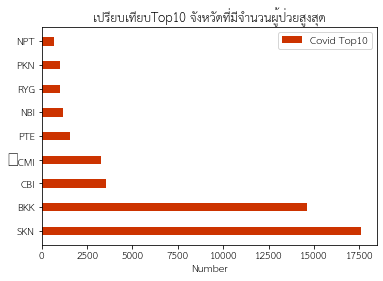

In [48]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels,Covid_Top10, width,label='Covid Top10',color = '#CC3300')

ax.set_xlabel('Number')
ax.set_title('เปรียบเทียบTop10 จังหวัดที่มีจำนวนผู้ป่วยสูงสุด')
ax.legend()

plt.show()

สรุปได้ว่า จังหวัดที่มีจำนวนผู้ป่วยโควิด-19 สูงสุด10จังหวัดคือ
1. จังหวัด สมุทรสาคร มีจำนวนผู้ป่วยที่ติดโควิด 17562 คน
2. จังหวัด กรุงเทพมหานคร มีจำนวนผู้ป่วยที่ติดโควิด 14611 คน
3. จังหวัด ชลบุรี มีจำนวนผู้ป่วยที่ติดโควิด 3542 คน
4. จังหวัด เชียงใหม่ มีจำนวนผู้ป่วยที่ติดโควิด 3285 คน
5. จังหวัด สมุทรปราการ มีจำนวนผู้ป่วยที่ติดโควิด 1542 คน
6. จังหวัด ปทุมธานี มีจำนวนผู้ป่วยที่ติดโควิด 1526 คน
7. จังหวัด นนทบุรี มีจำนวนผู้ป่วยที่ติดโควิด 1174 คน
8. จังหวัด ระยอง มีจำนวนผู้ป่วยที่ติดโควิด 1029 คน
9. จังหวัด ประจวบคีรีขันธ์ มีจำนวนผู้ป่วยที่ติดโควิด 1008 คน
10. จังหวัด นครปฐม มีจำนวนผู้ป่วยที่ติดโควิด 668 คน
ตามลำดับ 

# ข้อที่ 4 เปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค (5 ภูมิภาค (การท่องเที่ยว)) 

In [54]:
print(list(covid.groupby('province_of_onset'))) 

[('กระบี่',          No. announce_date  ... province_of_onset  district_of_onset
23        24    2020-02-04  ...            กระบี่          เกาะลันตา
386      387    2020-03-21  ...            กระบี่              เมือง
500      501    2020-03-22  ...            กระบี่          เกาะลันตา
943      944    2020-03-26  ...            กระบี่              เมือง
954      955    2020-03-26  ...            กระบี่           ไม่ปรากฎ
...      ...           ...  ...               ...                ...
53097  53098    2021-04-25  ...            กระบี่              เมือง
53141  53142    2021-04-25  ...            กระบี่              เมือง
53142  53143    2021-04-25  ...            กระบี่              เมือง
53143  53144    2021-04-25  ...            กระบี่              เมือง
53144  53145    2021-04-25  ...            กระบี่              เมือง

[78 rows x 10 columns]), ('กรุงเทพมหานคร',          No. announce_date  ... province_of_onset  district_of_onset
0          1    2020-01-12  ...     กรุงเทพมหาน

#### แบ่งจังหวัดผู้ป่วยที่ตรวจพบเชื้อ covid-19 ตามภาค 5 ภาค

In [72]:
# ภาคเหนือ (Northern)
Northern = pd.DataFrame(['เชียงใหม่', 'เชียงราย', 'ลำปาง', 'ลำพูน', 'แม่ฮ่องสอน', 'น่าน', 'พะเยา', 'แพร่', 'อุตรดิตถ์'
                                        ,'ตาก','สุโขทัย', 'พิษณุโลก', 'พิจิตร', 'กำแพงเพชร', 'เพชรบูรณ์','นครสวรรค์', 'อุทัยธานี'],columns=['Province'])
Northern['Region'] = 'Northern'


In [73]:
# ภาคตะวันออกเฉียงเหนือ (Northeastern)
Northeastern = pd.DataFrame(['อำนาจเจริญ', 'บึงกาฬ', 'บุรีรัมย์', 'ชัยภูมิ', 'กาฬสินธุ์', 'ขอนแก่น', 'เลย', 'มหาสารคาม', 'มุกดาหาร'
                                             , 'นครพนม', 'นครราชสีมา', 'หนองบัวลำภู', 'หนองคาย', 'ร้อยเอ็ด', 'สกลนคร', 'ศรีสะเกษ', 'สุรินทร์', 'อุบลราชธานี', 'อุดรธานี', 'ยโสธร'],columns=['Province'])
Northeastern['Region'] = 'Northeastern'

In [74]:
# ภาคกลาง (Central)
Central = pd.DataFrame(['อ่างทอง', 'ชัยนาท', 'พระนครศรีอยุธยา', 'กรุงเทพมหานคร', 'ลพบุรี', 'นครปฐม', 'นนทบุรี', 'ปทุมธานี', 'สมุทรปราการ', 'สมุทรสาคร'
                                    , 'สมุทรสงคราม', 'สระบุรี', 'สิงห์บุรี', 'สุพรรณบุรี','กาญจนบุรี', 'ราชบุรี','เพชรบุรี', 'ประจวบคีรีขันธ์'],columns=['Province'])
Central['Region'] = 'Central'

In [75]:
# ภาคตะวันออก (Eastern)
Eastern = pd.DataFrame(['ฉะเชิงเทรา', 'จันทบุรี', 'ชลบุรี', 'ปราจีนบุรี', 'ระยอง', 'สระแก้ว', 'ตราด'],columns=['Province'])
Eastern['Region'] = 'Eastern'

In [76]:
# ภาคใต้ (Southern)
Southern = pd.DataFrame(['ชุมพร', 'นครศรีธรรมราช', 'นราธิวาส', 'ปัตตานี', 'พัทลุง', 'สงขลา', 'สุราษฎร์ธานี', 'ยะลา'
                                       ,'กระบี่', 'พังงา', 'ภูเก็ต', 'ระนอง', 'สตูล', 'ตรัง'],columns= ['Province'])
Southern['Region'] = 'Southern'

In [77]:
covid_TH = pd.concat([Northern,Northeastern,Central,Eastern,Southern])
covid_TH

,Province,Region
0,เชียงใหม่,Northern
1,เชียงราย,Northern
2,ลำปาง,Northern
3,ลำพูน,Northern
4,แม่ฮ่องสอน,Northern
...,...,...
9,พังงา,Southern
10,ภูเก็ต,Southern
11,ระนอง,Southern
12,สตูล,Southern


In [83]:
# รวมตาราง covid เดิม และตารางที่แบ่งจังหวัดตามภูมิภาค
covid_All = covid.merge(covid_TH,how='left',left_on='province_of_isolation',right_on='Province')
covid_All

,No.,announce_date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,Province,Region
0,1,2020-01-12,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ,กรุงเทพมหานคร,Central
1,2,2020-01-17,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ,กรุงเทพมหานคร,Central
2,3,2020-01-22,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,Central
3,4,2020-01-22,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ,กรุงเทพมหานคร,Central
4,5,2020-01-24,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ,นนทบุรี,Central
...,...,...,...,...,...,...,...,...,...,...,...,...
57505,57506,2021-04-26,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,ไม่ปรากฎ,กรุงเทพมหานคร,Central
57506,57507,2021-04-26,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,ไม่ปรากฎ,กรุงเทพมหานคร,Central
57507,57508,2021-04-26,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,ไม่ปรากฎ,กรุงเทพมหานคร,Central
57508,57509,2021-04-26,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,ไม่ปรากฎ,กรุงเทพมหานคร,Central
